<p style="font-family: Arial; font-size:3.75vw;color:purple; font-style:bold"><br>
matplotlib Exercise Notebook
</p><br>

# Exercise Notebook Instructions

### 1. Important: Only modify the cells which instruct you to modify them - leave "do not modify" cells alone.  

The code which tests your responses assumes you have run the startup/read-only code exactly.

### 2. Work through the notebook in order.

Some of the steps depend on previous, so you'll want to move through the notebook in order.

### 3. It is okay to use numpy libraries.

You may find some of these questions are fairly straightforward to answer using built-in numpy functions.  That's totally okay - part of the point of these exercises is to familiarize you with the commonly used numpy functions.

### 4. Seek help if stuck

If you get stuck, don't worry!  You can either review the videos/notebooks from this week, ask in the course forums, or look to the solutions for the correct answer.  BUT, be careful about looking to the solutions too quickly.  Struggling to get the right answer is an important part of the learning process.

In [1]:
# DO NOT MODIFY

# import appropriate libraries

import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import pandas as pd 
%matplotlib inline

In [3]:
# DO NOT MODIFY

# we will use this dataset for some portions of this exercise.
# source: https://www.kaggle.com/hugomathien/soccer

def get_data():
    cnx = sqlite3.connect('./database.sqlite')
    df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
    return df

df = get_data()

In [4]:
#DO NOT MODIFY

# Let's see what is in our dataset
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>

Exercise 1: Line Plot<br><br></p>


In the cell below, modify the function to plot x vs y, where x and y 
are column names of dataframe (df) which is also entered as input to the function. The function should

- First sort the dataframe by the column 'x'
- Take the first 50 rows for plotting (discard the remaining)
- Provide a title
- Label x and y axes

In [15]:
# modify this cell

def line_plot(df, x, y):
    ### BEGIN SOLUTION
    df.sort_values(by=x, inplace=True)    
    plt.plot(df[:50][x],df[:50][y])
    
    # Label the axes
    plt.xlabel(x)
    plt.ylabel(y)
    
    # Label the figure
    plt.title('Line Plot of %s and %s' % (x,y))
    
    ### END SOLUTION

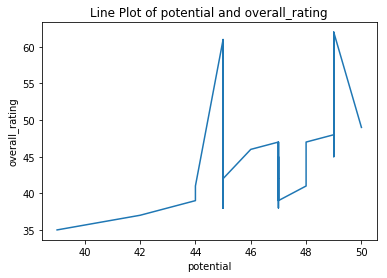

In [16]:
line_plot(df, 'potential', 'overall_rating')

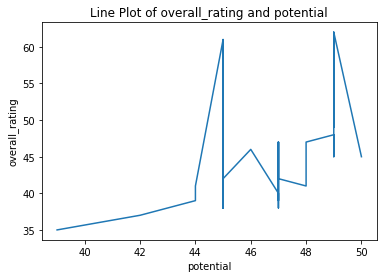

In [5]:
# DO NOT MODIFY

# your function should give a plot similar to the following:
line_plot(df, 'potential', 'overall_rating')

Your solution to Exercise 1 should look like this:
![plot1.png](attachment:plot1.png)

<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>

Exercise 2: Histogram <br><br></p>


In the cell below, modify the function to plot a histogram. The function should take an input parameter X which is a column name of the dataframe df, also passed to the function. Be sure to drop NULL values before you plot the histogram.

In [27]:
# modify this cell

def plot_histogram(df, X):
    ### BEGIN SOLUTION    
    hist_data = df.dropna()[X].values    
    
    plt.hist(hist_data, facecolor='green')
    
    # label
    plt.xlabel(X)
    plt.ylabel('# of Player')
    plt.title('Histogram of %s' % X)
    plt.grid(True)
    plt.show()
    ### END SOLUTION

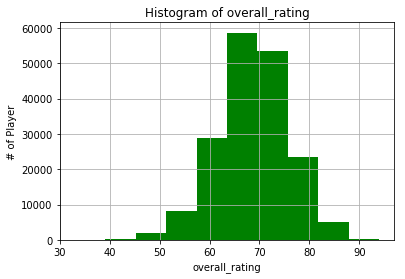

In [28]:
plot_histogram(df, 'overall_rating')

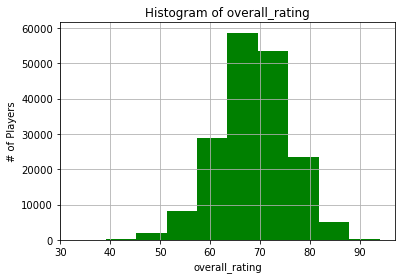

In [7]:
# DO NOT MODIFY

# your plot should look similar to the following:
plot_histogram(df, 'overall_rating')

Your solution for Exercise 2 should look like this:
![plot2.png](attachment:plot2.png)

<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>

Exercise 3: Scatter Plot<br><br></p>

In the cell below, modify the function to plot...

In [29]:
# modify this cell

def plot_scatter(df, x, y):
    ### BEGIN SOLUTION
    fig, axis = plt.subplots()
    
    axis.yaxis.grid(True)
    axis.set_title('Scatter Plot')
    axis.set_xlabel(x)
    axis.set_ylabel(y)
    
    X = df[x]
    Y = df[y]
    
    axis.scatter(X,Y)
    
    plt.show()        
    ### END SOLUTION

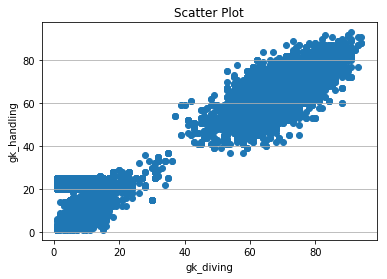

In [30]:
plot_scatter(df, 'gk_diving', 'gk_handling')

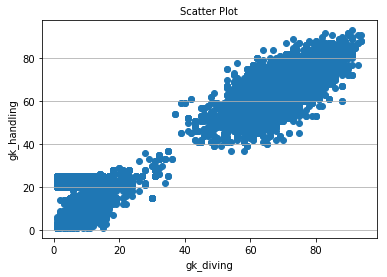

In [9]:
# DO NOT MODIFY

# your plot should look similar to the following:
plot_scatter(df, 'gk_diving', 'gk_handling')

Your solution to Excercise 3 should look like this:
![plot3.png](attachment:plot3.png)